In [1]:
import pandas as pd

from nltk.tokenize import sent_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
data = pd.read_csv('../data/data_features.csv')
data.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,excl_quest_sign_count,contractions_count,...,repeats_trigram_percent,repeats_fourgram_percent,verbs_count,nouns_count,adjectives_count,adverbs_count,articles_count,modal_count,ielts_phrases_count,phrasal_verbs_count
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,0,16,...,0.003861,0.003861,0.241379,0.180077,0.072797,0.049808,0.191489,0.030651,3,4
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,0,17,...,0.124294,0.124294,0.245779,0.166979,0.078799,0.046904,0.292135,0.026266,24,0
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,0,21,...,0.128931,0.128931,0.221875,0.212500,0.065625,0.046875,0.235294,0.025000,13,1
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,0,54,...,0.064738,0.064738,0.280220,0.129121,0.076923,0.063187,0.234043,0.020604,10,6
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,0,3,...,0.060345,0.060345,0.217949,0.252137,0.051282,0.021368,0.338983,0.025641,5,0


In [3]:
data.columns

Index(['text_id', 'full_text', 'cohesion', 'syntax', 'vocabulary',
       'phraseology', 'grammar', 'conventions', 'excl_quest_sign_count',
       'contractions_count', 'capitalized_mistakes', 'word_count',
       'sentence_count', 'paragraphs', 'paragraph_count',
       'avg_word_count_per_paragraph', 'avg_sentence_count_per_paragraph',
       'has_short_paragraphs', 'difficult_word_count',
       'spelling_mistake_count', 'spelling_mistakes_percent',
       'unique_linking_words_count', 'percentage_of_unique_words',
       'unique_linking_phrases_count', 'word_count_no_stopwords', 'mtld',
       'average_punctuation', 'punct_mistake', 'sentiment_compound',
       'word_length_avg', 'digits_counter', 'repeats_bigram_percent',
       'repeats_trigram_percent', 'repeats_fourgram_percent', 'verbs_count',
       'nouns_count', 'adjectives_count', 'adverbs_count', 'articles_count',
       'modal_count', 'ielts_phrases_count', 'phrasal_verbs_count'],
      dtype='object')

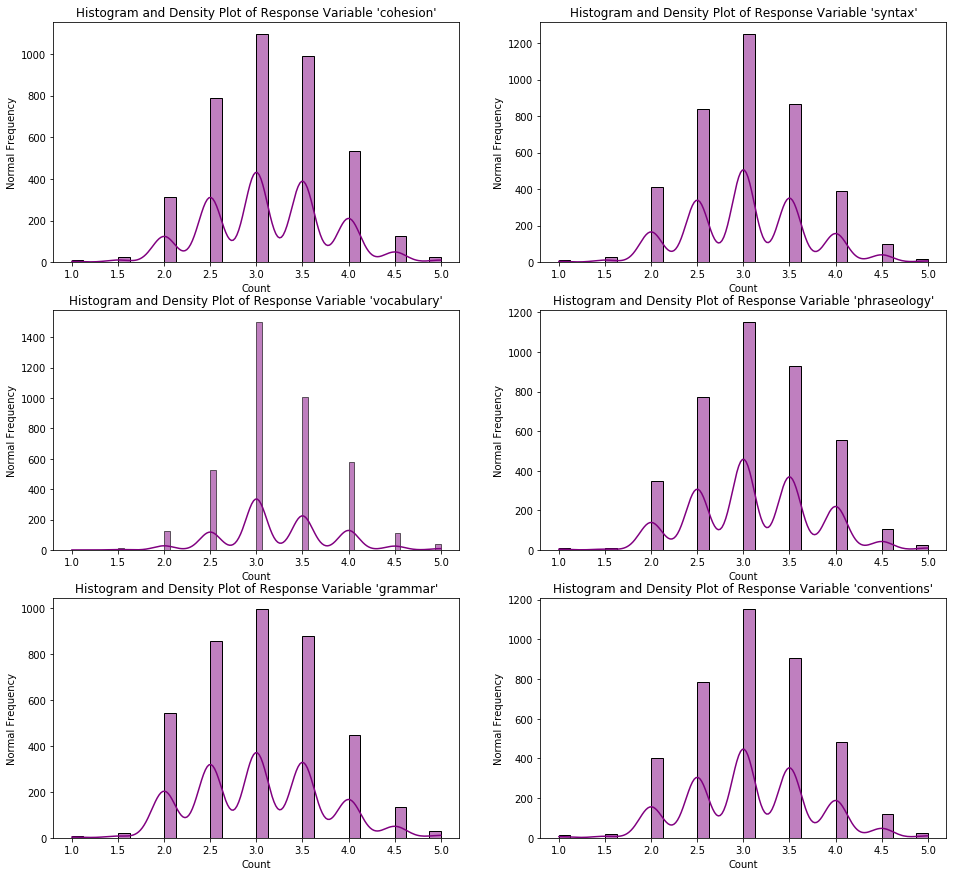

In [4]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(16,15)

ax[0][0].set_ylabel("Normal Frequency")
ax[0][0].set_xlabel("Count")
ax[0][0].set_title("Histogram and Density Plot of Response Variable 'cohesion'")
sns.histplot(data['cohesion'], kde=True, ax=ax[0][0], color ='purple')

ax[0][1].set_ylabel("Normal Frequency")
ax[0][1].set_xlabel("Count")
ax[0][1].set_title("Histogram and Density Plot of Response Variable 'syntax'")
sns.histplot(data['syntax'], kde=True, ax=ax[0][1], color ='purple')

ax[1][0].set_ylabel("Normal Frequency")
ax[1][0].set_xlabel("Count")
ax[1][0].set_title("Histogram and Density Plot of Response Variable 'vocabulary'")
sns.histplot(data['vocabulary'], kde=True, ax=ax[1][0], color ='purple')

ax[1][1].set_ylabel("Normal Frequency")
ax[1][1].set_xlabel("Count")
ax[1][1].set_title("Histogram and Density Plot of Response Variable 'phraseology'")
sns.histplot(data['phraseology'], kde=True, ax=ax[1][1], color ='purple')

ax[2][0].set_ylabel("Normal Frequency")
ax[2][0].set_xlabel("Count")
ax[2][0].set_title("Histogram and Density Plot of Response Variable 'grammar'")
sns.histplot(data['grammar'], kde=True, ax=ax[2][0], color ='purple')

ax[2][1].set_ylabel("Normal Frequency")
ax[2][1].set_xlabel("Count")
ax[2][1].set_title("Histogram and Density Plot of Response Variable 'conventions'")
sns.histplot(data['conventions'], kde=True, ax=ax[2][1], color ='purple')

In [5]:
data['final_score'] = data['cohesion'] + data['syntax'] + data['vocabulary'] + data['phraseology'] + data['grammar'] + data['conventions']

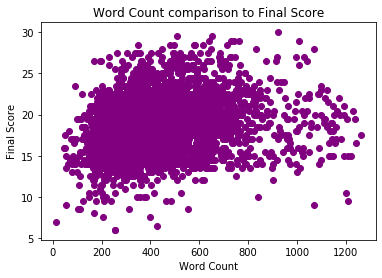

In [6]:
plt.scatter(data['word_count'], data['final_score'], color='purple')
plt.title('Word Count comparison to Final Score')
plt.xlabel('Word Count')
plt.ylabel('Final Score')
plt.show()

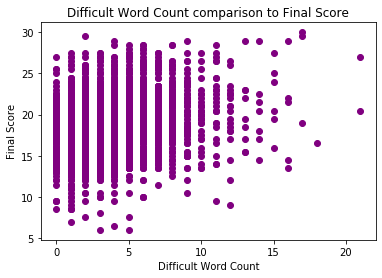

In [7]:
plt.scatter(data['difficult_word_count'], data['final_score'], color='purple')
plt.title('Difficult Word Count comparison to Final Score')
plt.xlabel('Difficult Word Count')
plt.ylabel('Final Score')
plt.show()

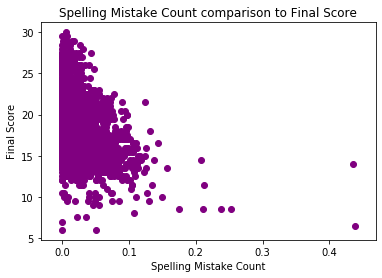

In [8]:
plt.scatter(data['spelling_mistakes_percent'], data['final_score'], color='purple')
plt.title('Spelling Mistake Count comparison to Final Score')
plt.xlabel('Spelling Mistake Count')
plt.ylabel('Final Score')
plt.show()

Text(0.5, 0, 'Symbol Count')

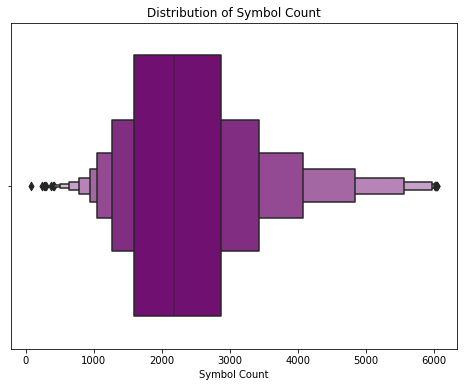

In [9]:
data['length'] = data['full_text'].apply(len)

plt.figure(figsize=(8, 6))
sns.boxenplot(data=data, x= 'length', color='purple')
plt.title('Distribution of Symbol Count')
plt.xlabel('Symbol Count')

Text(0.5, 0, 'Word Count')

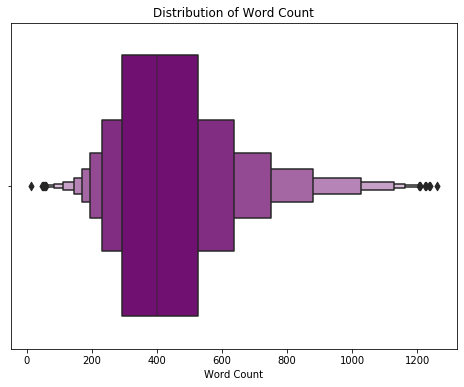

In [10]:
plt.figure(figsize=(8, 6))
sns.boxenplot(data=data, x= 'word_count', color='purple')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')

Text(0.5, 0, 'Sentence Count')

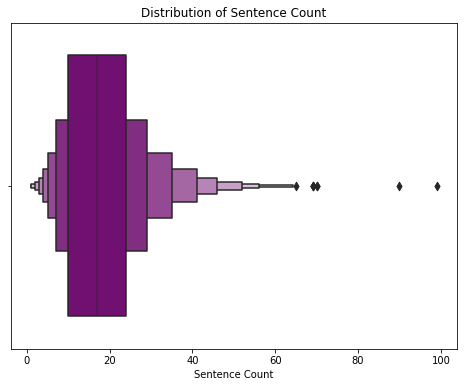

In [11]:
plt.figure(figsize=(8, 6))
sns.boxenplot(data=data, x= 'sentence_count', color='purple')
plt.title('Distribution of Sentence Count')
plt.xlabel('Sentence Count')

Text(0.5, 0, 'Paragraph Count')

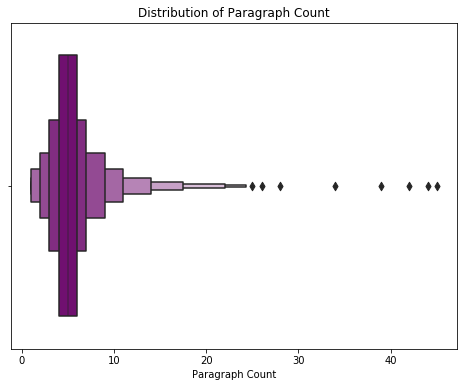

In [12]:
plt.figure(figsize=(8, 6))
sns.boxenplot(data=data, x= 'paragraph_count', color='purple')
plt.title('Distribution of Paragraph Count')
plt.xlabel('Paragraph Count')

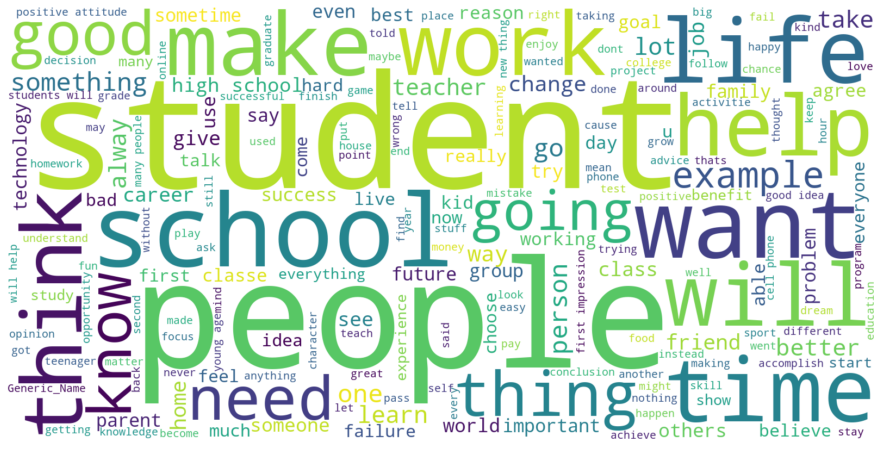

In [18]:
text = data.full_text.str.cat(sep=' ')

wc = WordCloud(width=1600,height=800,
                      background_color='white',
                      max_words=200,
                      stopwords=STOPWORDS)

wc.generate(text)

plt.figure(figsize= (16,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

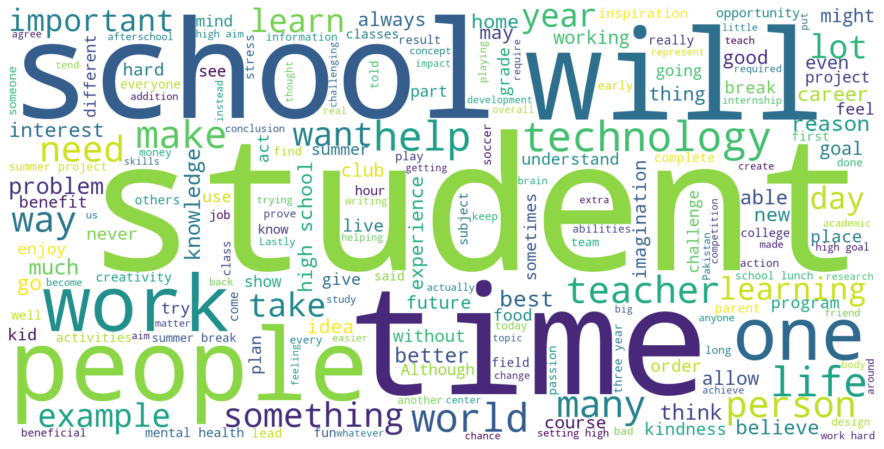

In [13]:
text_good_score = data[data["final_score"] >= 28].full_text.str.cat(sep=' ')

wc = WordCloud(width=1600,height=800,
                      background_color='white',
                      max_words=200,
                      stopwords=STOPWORDS)

wc.generate(text_good_score)

plt.figure(figsize= (16,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

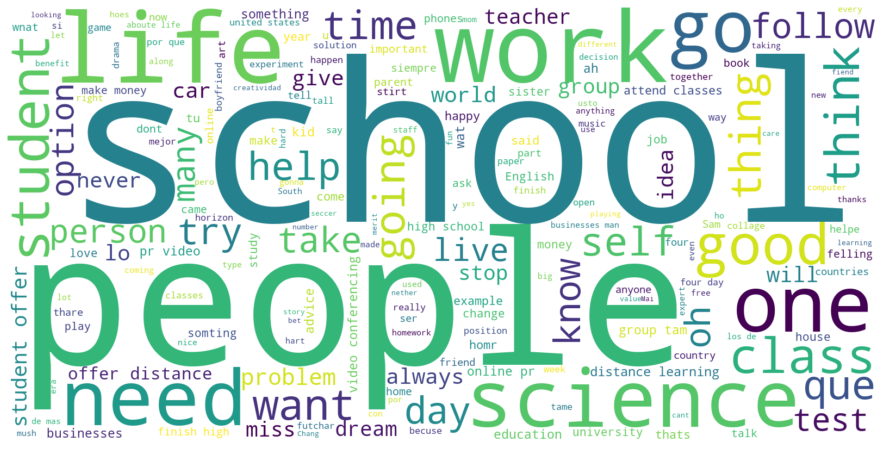

In [14]:
text_bad_score = data[data["final_score"] < 10].full_text.str.cat(sep=' ')

wc = WordCloud(width=1600,height=800,
                      background_color='white',
                      max_words=200,
                      stopwords=STOPWORDS)

wc.generate(text_bad_score)

plt.figure(figsize= (16,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
corr_matrix = data.corr()
corr_matrix = corr_matrix[['cohesion', 'syntax', 'vocabulary',
       'phraseology', 'grammar', 'conventions']]
corr_matrix

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
cohesion,1.000000,0.695459,0.666151,0.690058,0.638689,0.666151
syntax,0.695459,1.000000,0.680562,0.725467,0.709525,0.700025
vocabulary,0.666151,0.680562,1.000000,0.735261,0.654852,0.664292
phraseology,0.690058,0.725467,0.735261,1.000000,0.719746,0.666842
grammar,0.638689,0.709525,0.654852,0.719746,1.000000,0.673301
conventions,0.666151,0.700025,0.664292,0.666842,0.673301,1.000000
excl_quest_sign_count,0.087953,0.097819,0.100692,0.090370,0.078041,0.068317
contractions_count,0.084399,0.082533,0.115492,0.111348,0.051789,0.075638
capitalized_mistakes,-0.283876,-0.292599,-0.253232,-0.249882,-0.216599,-0.305366
word_count,0.218739,0.188038,0.271143,0.214308,0.080283,0.143493


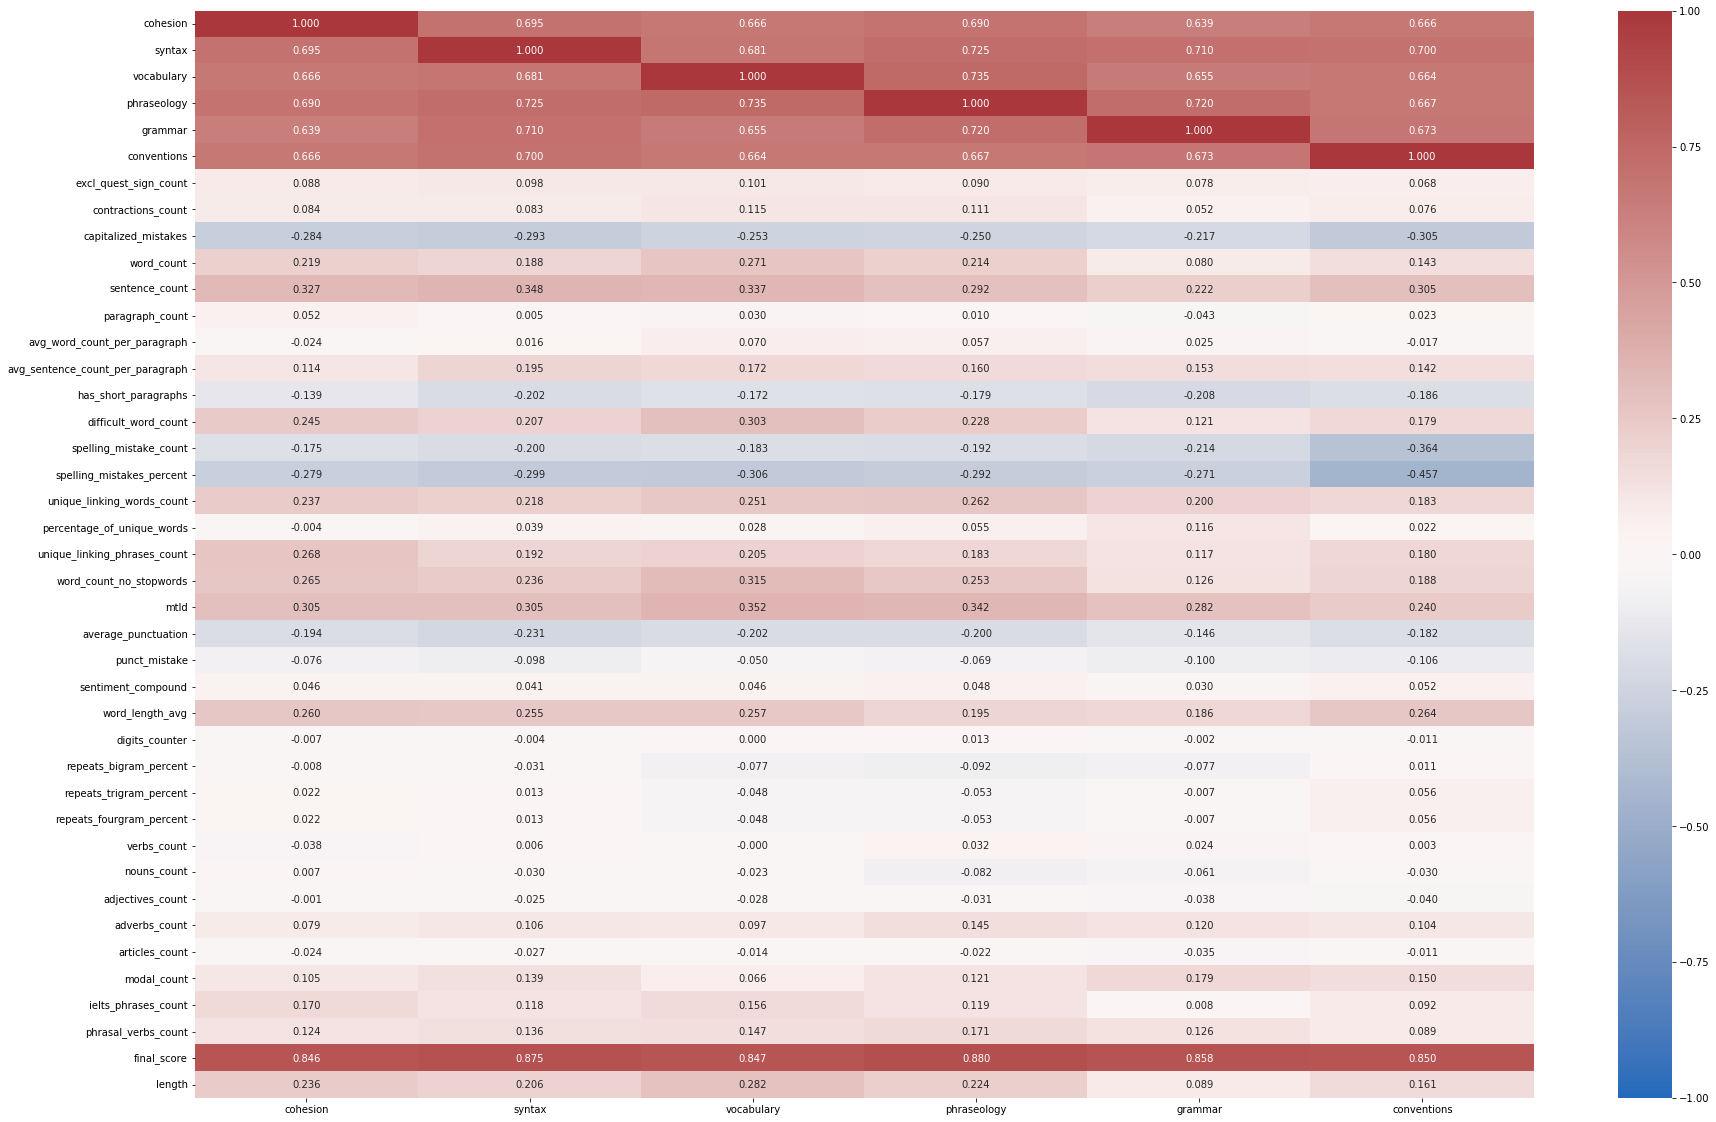

In [14]:
fig, ax = plt.subplots(figsize=(30, 20))

ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt=".3f", cmap="vlag")
bottom, top = ax.get_ylim()
ax = ax.set_ylim(bottom + 0.5, top - 0.5)

In [15]:
fig, ax = plt.subplots(figsize=(30, 20))

ax = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, fmt=".3f", cmap="vlag")
bottom, top = ax.get_ylim()
ax = ax.set_ylim(bottom + 0.5, top - 0.5)